In [17]:
#Imports all the libraries used in the code
import pandas as pd
import operator
from nltk import word_tokenize
from nltk import pos_tag
from nltk import bigrams
from json import JSONDecodeError
from googletrans import Translator
df = pd.read_csv("C:\\Users\\Mohammed\\Downloads\\finalresult.csv", delimiter='\t', header=None)
#drops any null reviews in the CSV
df = df.dropna()

#shows how many columns to read in the dataframe
amazon_rating = list(df[1])
amazon_reviews = list(df[2])

from textblob import TextBlob
#creates a variable that stores an empty array
sentimentClassificationLabels = []
amazonReviewRating = []
matchingResults = []
#translator = Translator()

#creates a function
def sentamentAnalysis(review_text):
    #trans = translator.translate(review_text).text
    #reads the rewview and looks at the words used and assigns them a sentiment score
    blob = TextBlob(review_text)
#   print('\t',review_text)
    #variable for overall score
    overallScore = 0
    #runs for every sentence in review
    for sentence in blob.sentences:
        #adds setence score to overall score
        overallScore += sentence.sentiment.polarity
    #If Statement checks if overall score is gretaer than 0 and labels it positive
    if overallScore > 0:
        sentimentLevelForCurrentReview = 'Positive';
    #else if the score is below 0 label it negative
    elif overallScore < 0:
        sentimentLevelForCurrentReview = 'Negative';
    #else if the score is not less than or greater than 0 and is bang on, the review is automatically labeled positive
    else:
        sentimentLevelForCurrentReview = 'Positive';
    #returns the level of the current review
    return sentimentLevelForCurrentReview

def reviewScore(i):
    if(amazon_rating[i] >= 3.0):
        ratingReviewForCurrentReview = "Positive";
    elif(amazon_rating[i] < 3.0):
        ratingReviewForCurrentReview = "Negative";
    return ratingReviewForCurrentReview

def doResultsMatchRating(i, e):
    if(i == e):
        doResultsMatch = "Match";
    else:
        doResultsMatch = "Non-Match";
    return doResultsMatch

#for loop to run for each review in the dataframe
for index, review_text in enumerate(amazon_reviews):
#    print(review_text)
    #adds the labels to a list
    try:
        sentimentClassificationLabels.append(sentamentAnalysis(review_text))
        amazonReviewRating.append(reviewScore(index))
        matchingResults.append(doResultsMatchRating(sentamentAnalysis(review_text),reviewScore(index)))
    except JSONDecodeError:
        print(index, review_text)
#stores the sentiment clasification label in another column in the dataframe
df[3] = sentimentClassificationLabels
df[4] = amazonReviewRating
df[5] = matchingResults
pd.set_option('display.max_rows',df.shape[0]+1)

df
df.rename(columns={0: "ID", 1: "Star Rating", 2: "Review Text", 3: "Reviewer Result", 4: "AI Result", 5: "Match/Non-Match"})

,ID,Star Rating,Review Text,Reviewer Result,AI Result,Match/Non-Match
0,1,5.0,The firestick gave new life to an old tv,Positive,Positive,Match
1,2,5.0,Like used for entertainment,Positive,Positive,Match
2,3,5.0,Fast and the variety,Positive,Positive,Match
3,4,5.0,Me encanto!! Muy buen precio. Buena calidad.,Positive,Positive,Match
4,5,5.0,Great bargain.,Positive,Positive,Match
5,6,5.0,The fire stick is so easy to use. I’m not good...,Positive,Positive,Match
6,7,5.0,This 4K fire stick is very amazing best in the...,Positive,Positive,Match
7,8,1.0,I believe I was sent a defective unit. It star...,Negative,Negative,Match
8,9,3.0,"I purchased a fire stick years ago, but decide...",Positive,Positive,Match
9,10,2.0,What is clearly not advertised is that Dolby A...,Positive,Negative,Non-Match


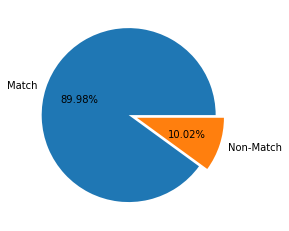

In [18]:
df[5].value_counts().plot(kind='pie',autopct='%.2f%%', explode=[0,0.1]).axes.get_yaxis().set_visible(False)

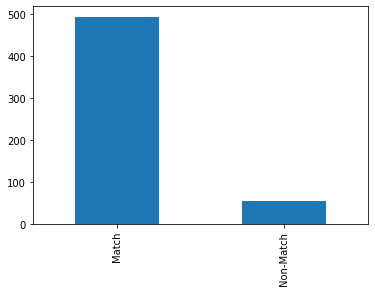

In [19]:
df[5].value_counts().plot(kind='bar')

In [20]:
#function to compute the frequency of bigrams
def compute_frequency_of_bigrams(bigrams_with_pos_tags):
    bigrams_with_frequencies = {}
    for first_element, second_element in bigrams_with_pos_tags:
        first_word_of_bigram, first_word_pos_tag = first_element[0], first_element[1]
        second_word_of_bigram, second_word_pos_tag = second_element[0], second_element[1]
        #POS Filtering checks the pos tags on words and filters out those that don't match the criteria
        if(first_word_pos_tag == 'JJ' and second_word_pos_tag == 'NN'
          or first_word_pos_tag == 'NN' and second_word_pos_tag == 'NN'
          or first_word_pos_tag == 'NNP' and second_word_pos_tag == 'NNP'
          or first_word_pos_tag == 'NNP' and second_word_pos_tag == 'NN'):
#checks if the first and second words of the bigram are already in the frequencies
            if (first_word_of_bigram, second_word_of_bigram) in bigrams_with_frequencies:
#adds 1 to the count
                bigrams_with_frequencies[(first_word_of_bigram, second_word_of_bigram)] += 1
#else the count stays as 1
            else:
                bigrams_with_frequencies[(first_word_of_bigram, second_word_of_bigram)] = 1
        continue
    return bigrams_with_frequencies

amazon_reviews = df[2]

#empty strings for positive reviews
pos_reviews = ""
neg_reviews = ""

#for all rows in reviews
for index, row in df.iterrows():
#if review is positive put it in positive string
    if(str(df[3][index])=='Negative'):
        pos_reviews += str(df[2][index])
        #pos_review += ""
#else put it in the negative strings
    else:
        neg_reviews += str(df[2][index])
        #neg_document += ""

#tokenizes words
words1 = word_tokenize(pos_reviews)
#gives words pos tags
words_with_pos_tags1 = pos_tag(words1)
#puts the bigrams into a list
bigrams_with_pos_tags1 = list(bigrams(words_with_pos_tags1))
#runs the bigrams through the compute function
bigrams_with_frequencies1 = compute_frequency_of_bigrams(bigrams_with_pos_tags1)
bigrams_with_frequencies_sorted1 = dict(sorted(bigrams_with_frequencies1.items(),
                                                  key=operator.itemgetter(1), reverse=True))
print ("Positive Reviews:")
i = 0
for k,v in bigrams_with_frequencies_sorted1.items(): # Get key value pairs from sorted dict
    print(i + 1, ": ", k, v) # Print rank, key, value
    i += 1
    if (i == 40): # increment i and check if we have printed 40 values, if so break out of loop
        break
        
            
#duplicate below code for negative reviews
words2 = word_tokenize(neg_reviews)
words_with_pos_tags2 = pos_tag(words2)
bigrams_with_pos_tags2 = list(bigrams(words_with_pos_tags2))
bigrams_with_frequencies2 = compute_frequency_of_bigrams(bigrams_with_pos_tags2)
bigrams_with_frequencies_sorted2 = dict(sorted(bigrams_with_frequencies2.items(),
                                                  key=operator.itemgetter(1), reverse=True))
print()
print ("Negative Reviews:")
i = 0 # Reset i to 0
for k,v in bigrams_with_frequencies_sorted2.items(): # Get key value pairs from sorted dict
    print(i + 1, ": ", k, v) # print rank, key, value
    i += 1
    if (i == 40): # increment i and check if we have printed 40 values, if so break out of loop
        break


Positive Reviews:
1 :  ('fire', 'stick') 8
2 :  ('’', 't') 5
3 :  ('Fire', 'TV') 5
4 :  ('customer', 'service') 3
5 :  ('defective', 'unit') 2
6 :  ('t', 'watch') 2
7 :  ('Fire', 'Stick') 2
8 :  ('TV', 'stick') 2
9 :  ('old', 'fire') 2
10 :  ('customer', 'support') 2
11 :  ('stream', 'quality') 1
12 :  ('ultra', 'fire') 1
13 :  ('next', 'streaming') 1
14 :  ('streaming', 'device') 1
15 :  ('’', 've') 1
16 :  ('United', 'tech') 1
17 :  ('Big', 'change') 1
18 :  ('game', 'changer') 1
19 :  ('movie', 'viewing') 1
20 :  ('easy', 'transition') 1
21 :  ('Home', 'button') 1
22 :  ('button', 'doesn') 1
23 :  ('home', 'screen') 1
24 :  ('..terrible', 'integration') 1
25 :  ('terribleMy', 'remote') 1
26 :  ('remoteOnly', 'thing') 1
27 :  ('same', 'timing') 1
28 :  ('off.The', 'fire') 1
29 :  ('fire', 'TV') 1
30 :  ('major', 'malfunction') 1
31 :  ('only', 'way') 1
32 :  ('other', 'firestick') 1
33 :  ('only', 'thing') 1
34 :  ('firestick', 'nothing') 1
35 :  ('Remote', 'doesn') 1
36 :  ('Hard', 